In [12]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2000-01-01'
end = '2020-12-31'

# Tickers of assets
assets = """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS VEDL.NS	WIPRO.NS ^BSESN""".split()

#assets = list(map(lambda x: x.strip(), assets))

assets.sort()

# Downloading data
prices = yf.download(assets, start=start, end=end)
display(prices.head())
prices = prices.dropna()
display(prices.head())


[*********************100%***********************]  29 of 29 completed


Adj Close                                                  \
           AXISBANK.NS    BPCL.NS BRITANNIA.NS    CIPLA.NS  DRREDDY.NS   
Date                                                                     
2000-01-03   369.9342% 1301.4574%   5437.0892% 10032.7553% 32412.2711%   
2000-01-04   384.2173% 1207.7396%   5420.2084% 10087.1414% 35006.1188%   
2000-01-05   374.2192% 1173.3493%   5281.9275%  9879.2381% 33697.3816%   
2000-01-06   364.9351% 1239.6854%   5643.6096%  9334.0050% 35706.6986%   
2000-01-07   347.0811% 1238.2184%   6095.0844%  8588.4399% 32860.3455%   

                                                                         ...  \
           EICHERMOT.NS   GAIL.NS HDFCBANK.NS HINDALCO.NS HINDUNILVR.NS  ...   
Date                                                                     ...   
2000-01-03    289.1769% 632.0055%  1429.2336%  5724.0562%   13538.5239%  ...   
2000-01-04    304.2721% 610.3866%  1461.1814%  5941.1537%   13383.0414%  ...   
2000-01-05    328.8389% 581.4080%  1403.5916%  6416.2605%   12906.9321%  ...   
2000-01-06    355.1815% 597.5072%  1414.9413%  6918.4212%   13424.9893%  ...   
2000-01-07    382.7081% 576.3484%  1415.3615%  7225.2640%   14156.9061%  ...   

               Volume                                             \
           SIEMENS.NS SUNPHARMA.NS   TATACONSUM.NS TATAMOTORS.NS   
Date                                                               
2000-01-03    5868160       390399 163761000.0000%       3528277   
2000-01-04    5128620       747102  83733000.0000%       3544397   
2000-01-05    2141030       788156  85466000.0000%       5849540   
2000-01-06    2027820       448235 132851000.0000%      10274966   
2000-01-07     924060       532538 335382000.0000%      11477451   

                                                                            
              TATAPOWER.NS TATASTEEL.NS TITAN.NS  VEDL.NS WIPRO.NS  ^BSESN  
Date                                                                        
2000-01-03  99499700.0000%     35678775   460000   814840    42639 0.0000%  
2000-01-04 105830200.0000%     27698564   526000   894640   117119 0.0000%  
2000-01-05  87341400.0000%     68399389   412000   732200  3527919 0.0000%  
2000-01-06 208848000.0000%     45604218   632000  1032000  1942399 0.0000%  
2000-01-07  51464300.0000%     64862245   732000   694440   269599 0.0000%  

[5 rows x 174 columns]

Adj Close                                                  \
           AXISBANK.NS    BPCL.NS BRITANNIA.NS    CIPLA.NS  DRREDDY.NS   
Date                                                                     
2000-01-03   369.9342% 1301.4574%   5437.0892% 10032.7553% 32412.2711%   
2000-01-04   384.2173% 1207.7396%   5420.2084% 10087.1414% 35006.1188%   
2000-01-05   374.2192% 1173.3493%   5281.9275%  9879.2381% 33697.3816%   
2000-01-06   364.9351% 1239.6854%   5643.6096%  9334.0050% 35706.6986%   
2000-01-07   347.0811% 1238.2184%   6095.0844%  8588.4399% 32860.3455%   

                                                                         ...  \
           EICHERMOT.NS   GAIL.NS HDFCBANK.NS HINDALCO.NS HINDUNILVR.NS  ...   
Date                                                                     ...   
2000-01-03    289.1769% 632.0055%  1429.2336%  5724.0562%   13538.5239%  ...   
2000-01-04    304.2721% 610.3866%  1461.1814%  5941.1537%   13383.0414%  ...   
2000-01-05    328.8389% 581.4080%  1403.5916%  6416.2605%   12906.9321%  ...   
2000-01-06    355.1815% 597.5072%  1414.9413%  6918.4212%   13424.9893%  ...   
2000-01-07    382.7081% 576.3484%  1415.3615%  7225.2640%   14156.9061%  ...   

               Volume                                             \
           SIEMENS.NS SUNPHARMA.NS   TATACONSUM.NS TATAMOTORS.NS   
Date                                                               
2000-01-03    5868160       390399 163761000.0000%       3528277   
2000-01-04    5128620       747102  83733000.0000%       3544397   
2000-01-05    2141030       788156  85466000.0000%       5849540   
2000-01-06    2027820       448235 132851000.0000%      10274966   
2000-01-07     924060       532538 335382000.0000%      11477451   

                                                                            
              TATAPOWER.NS TATASTEEL.NS TITAN.NS  VEDL.NS WIPRO.NS  ^BSESN  
Date                                                                        
2000-01-03  99499700.0000%     35678775   460000   814840    42639 0.0000%  
2000-01-04 105830200.0000%     27698564   526000   894640   117119 0.0000%  
2000-01-05  87341400.0000%     68399389   412000   732200  3527919 0.0000%  
2000-01-06 208848000.0000%     45604218   632000  1032000  1942399 0.0000%  
2000-01-07  51464300.0000%     64862245   732000   694440   269599 0.0000%  

[5 rows x 174 columns]

In [13]:
############################################################
# Defining the backtest function
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005)  # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005,  # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        cerebro.plot(iplot=False, start=start, end=end)
    return (results[0].analyzers.drawdown.get_analysis()['max']['drawdown'],
            results[0].analyzers.returns.get_analysis()['rnorm100'],
            results[0].analyzers.sharperatio.get_analysis()['sharperatio'])


In [14]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != '^BSESN':
        prices_ = prices.drop(
            columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))

# Creating Benchmark bt.feeds
prices_ = prices.drop(
    columns='Adj Close').loc[:, (slice(None), '^BSESN')].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())


,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,537510.9863%,538466.0156%,520954.0039%,520954.0039%,0.0000%
2000-01-04,549100.9766%,553397.9980%,537643.0176%,553397.9980%,0.0000%
2000-01-05,535700.0000%,546435.0098%,518447.9980%,526508.9844%,0.0000%
2000-01-06,542152.9785%,548985.9863%,539133.0078%,542420.9961%,0.0000%
2000-01-07,541447.9980%,546325.0000%,533058.0078%,535827.9785%,0.0000%


In [15]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= 1004:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1


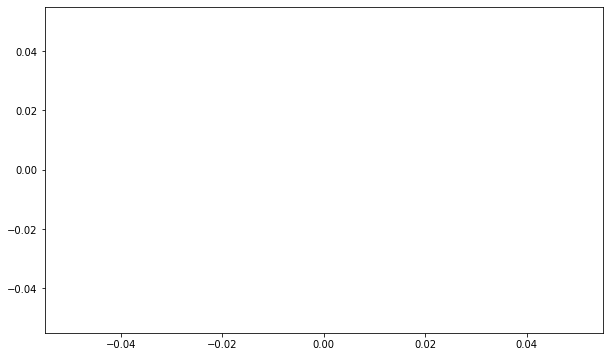

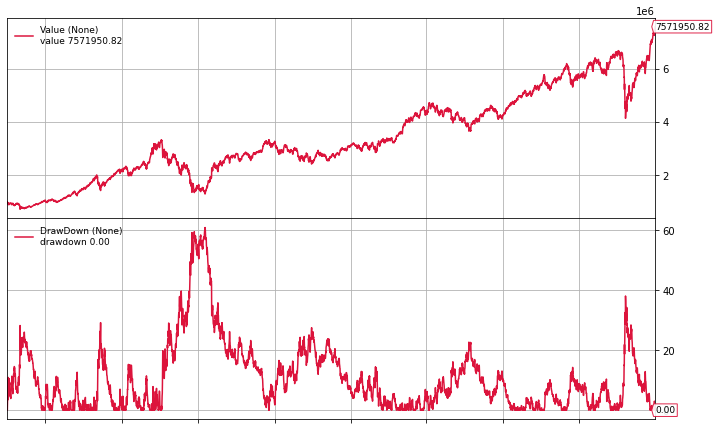

In [16]:
############################################################
# Run the backtest for the selected period
############################################################
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)  # (w, h)
plt.plot()  # We need to do this to avoid errors in inline plot

start = 1004
end = prices.shape[0] - 1

dd, cagr, sharpe = backtest([benchmark],
                            BuyAndHold,
                            start=start,
                            end=end,
                            plot=True)


In [17]:
############################################################
# Show Buy and Hold Strategy Stats
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")


Max Drawdown: 60.88%
CAGR: 10.37%
Sharpe: 0.506


In [18]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=['^BSESN']).dropna()
returns = data.pct_change().dropna()
display(returns.head())


,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.8610%,-7.2010%,-0.3105%,0.5421%,8.0027%,5.2200%,-3.4207%,2.2353%,3.7927%,-1.1484%,...,6.3411%,0.2936%,-1.3406%,-2.4092%,-3.9446%,0.1954%,-1.0824%,-5.3308%,-1.4181%,8.0005%
2000-01-05,-2.6022%,-2.8475%,-2.5512%,-2.0611%,-3.7386%,8.0740%,-4.7476%,-3.9413%,7.9969%,-3.5576%,...,-4.1104%,-4.4003%,-3.5102%,-4.1659%,2.4256%,1.9506%,3.8130%,-6.1058%,-0.6103%,1.6298%
2000-01-06,-2.4809%,5.6536%,6.8475%,-5.5190%,5.9628%,8.0108%,2.7690%,0.8086%,7.8264%,4.0138%,...,5.0513%,1.4354%,-0.0973%,3.3431%,4.1500%,3.1250%,7.4736%,8.0202%,4.6491%,-1.9347%
2000-01-07,-4.8924%,-0.1183%,7.9998%,-7.9876%,-7.9715%,7.7500%,-3.5412%,0.0297%,4.4352%,5.4519%,...,4.7127%,-7.9623%,-7.9991%,7.9729%,8.0144%,-0.1856%,2.1991%,-2.1070%,-2.3470%,-7.9990%
2000-01-10,3.0864%,1.3426%,7.5074%,-3.3386%,-1.6480%,1.3148%,-0.5586%,-1.4553%,-6.5802%,0.7584%,...,-1.3904%,-1.8245%,-4.5933%,0.8827%,7.8991%,7.0013%,5.9901%,-0.9908%,2.1459%,0.1353%


In [19]:
############################################################
# Selecting Dates for Rebalancing
############################################################

# Selecting last day of month of available data
index = returns.groupby(
    [returns.index.year, returns.index.month]).tail(1).index
index_2 = returns.index

# Quarterly Dates
index = [x for x in index if float(x.month) % 3.0 == 0]

# Dates where the strategy will be backtested
index_ = [index_2.get_loc(x) for x in index if index_2.get_loc(x) > 1000]


In [27]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):

        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            j += 1

        self.counter = 0

    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1


In [32]:
import riskfolio as rp
%% time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
#        'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

rms = ['MV']

weights = pd.DataFrame([])

for i in index_:
    # taking last 4 years (250 trading days per year)
    Y = returns.iloc[i-1000:i, :]

    # Building the portfolio object
    port = rp.Portfolio(returns=Y)

    # Add portfolio constraints


    # Calculating optimum portfolio

    # Select method and estimate input parameters:

    # Method to estimate expected returns based on historical data.
    method_mu = 'hist'
    # Method to estimate covariance matrix based on historical data.
    method_cov = 'hist'

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    # Estimate optimal portfolio:

    #port.solvers = ['MOSEK']
    #port.alpha = 0.05
    # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
    model = 'Classic'
    rm = j  # Risk measure used, this time will be variance
    obj = 'Sharpe'  # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True  # Use historical scenarios for risk measures that depend on scenarios
    rf = 0  # Risk free rate
    l = 0  # Risk aversion factor, only useful when obj is 'Utility'

    w = port.optimization(model=model, rm=rm, obj=obj,
                            rf=rf, l=l, hist=hist)

    if w is None:
        w = weights.tail(1).T
    weights = pd.concat([weights, w.T], axis=0)

    # models[j] = weights.copy()
    # models[j].index = index_

############################################################
# Backtesting Mean Variance Strategy
############################################################

assets = returns.columns.tolist()

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)


UsageError: Line magic function `%%` not found.


In [33]:
############################################################
# Show Mean Variance Strategy Stats
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")


Max Drawdown: 60.88%
CAGR: 10.37%
Sharpe: 0.506


Max Drawdown: 60.88%
CAGR: 10.37%
Sharpe: 0.506


In [ ]:
############################################################
# Plotting the composition of the last MV portfolio
############################################################

w = pd.DataFrame(models['MV'].iloc[-1, :])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))
